# 5.5 다항 회귀(Polynomial Regression)와 과(대)적합(Overfitting)/과소적합(Underfitting) 이해

## 다항 회귀(Polynomial Regression) 이해

* 5.1 ~ 5.4 장에서 설명한 회귀는 독립변수 (feature)와 종속변수(target) 의 관계가 일차 방정식 형태로 표현된 회귀 (직선)
* 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항 (Polynomial) 회귀라고 함
* 다항 회귀(Polynomial Regression) 는 선형 회귀 (회귀 계수가 선형이므로)

아래의 선형 회귀 모델을
<img src="http://postfiles1.naver.net/20160903_224/je1206_1472877120628hcSIt_PNG/aaaa.png?type=w773" />

이 다항식 함수로 대체하는 것
<img src="http://postfiles1.naver.net/20160903_112/je1206_14728771206515z6Fz_PNG/asdfg.png?type=w773" />

그래프로 보면

### 선형 회귀(Linear Regression)

<img src="https://miro.medium.com/max/1000/1*7w8mfB_Ecfr0x76Vc7qang.gif" width="500"/>

### 다항 회귀(Polynomial Regression)

<img src="https://miro.medium.com/max/1000/1*d3vy9uKM4xL6WW05umcHkw.gif" width="500"/>

<small><a href="https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1" target="_blank">그림 출처: https://towardsdatascience.com/machine-learning-basics-polynomial-regression-3f9dd30223d1</a></small>

    
* 그래프를 보면 단순 선형 회귀 직선형으로 표현한 것보다 다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음 


### 실습 

* 사이킷런은 다항 회귀를 귀한 클래스를 명시적으로 제공 하지 않음
* 대신 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현
* PolynomialFeatures 클래스를 통해 피처를 PolynomialFeatures(다항식 피처)로 변환


In [6]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [7]:
def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [[ 1  5]
 [17 43]]


In [10]:
from sklearn.linear_model import LinearRegression

# 3차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomial 회귀 Shape : (2, 10)


#### 위와 같이 피처변환, 선형 회귀 적용을 별도로 하는 것보다 사이킷런의 Pipeline 객체 이용해 한 번에 다항 회귀 구현하는 것을 추천

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X + X ** 2 + X ** 3
    return y

# Pipeline 객체로 간소(Streamline) 하게 다항식 피처(Polynomial Feature)변환과 선형 회귀(Linear Regression)을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


## 다항 회귀를 이용한 과소적합 및 과적합 이해


* 다항 회귀는 다항식의 차수가 높아질수록 복잡한 피처 간의 관계 모델링 가능
* 다항 회귀의 차수 (degree) 를 높일수록 학습 데이터에 과도하게 최적화되어 예측 정확도가 떨어지는 문제 발생

### 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제 실습


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716240e+07
 -1.44873341e+08  7.09315840e+08 -2.47066022e+09  6.24561781e+09
 -1.15676672e+10  1.56895187e+10 -1.54006300e+10  1.06457475e+10
 -4.91378589e+09  1.35919961e+09 -1.70381209e+08] 입니다.
Degree 15 MSE 는 182594790.08 입니다.


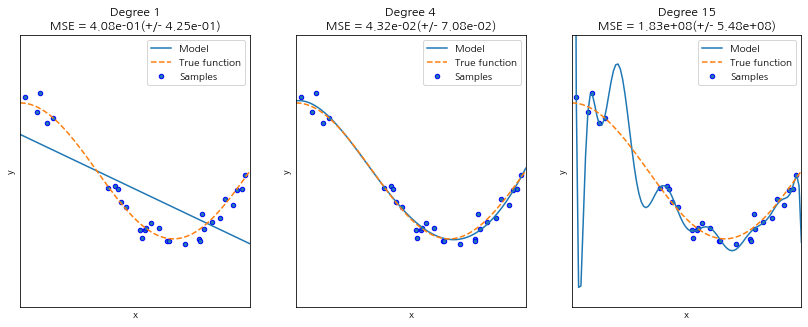

In [19]:
#예측 결과 비교할 다항식 차수를 1, 4, 15로 변경하면서 예측 결과 비교

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

#MSE: 평균 제곱 오차(Mean squared error) 추측값에 대한 정확도 측정

* 왼쪽 그래프는 단순한 직선으로서 예측 곡선이 학습 데이터의 패턴을 제대로 반영 못한 과소 적합 모델
* 가운데 그래프는 실제 데이터 세트와 유사하며 가장 뛰어난 예측 성능 나타냄
* 과도하게 학습 데이터에만 최적화되고 테스트 값의 실제 곡선과는 완전히 다른 형태, 과적합이 심한 모델

## 편향-분산 트레이드오프 (Bias-Vriance Trade off)

* 위의 왼쪽 그래프처럼 지나치게 단순하고 한 방향으로 치친 모델을 고편향(High Bias)을 가졌다고 표현함
* 위의 오른쪽 그래프처럼 지나치게 복잡하고 높은 변동성을 가진 모델을 고분산(High Variance)성을 가졌다고 표현함

<img src="https://miro.medium.com/max/978/1*CgIdnlB6JK8orFKPXpc7Rg.png" width="400"/>

1. 왼쪽 상단 과녁은 \
예측값들이 대체로 정답 근방에서 왔다갔다 합니다.->편향이 낮습니다.\
예측값들끼리서로 몰려 있습니다.->분산이 낮습니다.


2. 오른쪽 상단 과녁은 \
예측값들이 대체로 정답 근방에서 왔다갔다 합니다.->편향이 낮습니다.\
예측값들끼리 서로 흩어져 있습니다.->분산이 높습니다.


3. 왼쪽 하단 과녁은\
예측값들이 대체로 정답으로부터 멀어져 있습니다.->편향이 높습니다.\
예측값들끼리 서로 몰려 있습니다.->분산이 낮습니다.


4. 오른쪽 하단 과녁은\
예측값들끼리 대체로 정답으로부터 멀어져 있습니다.->편향이 높습니다.\
예측값들끼리 서로 흩어져 있습니다.->분산이 높습니다.


* 일반적으로 편향과 분산은 반비례 관계
* 편향이 높으면 분산 낮아지고 (과소적합 Underfitting) 반대로 분산 높으면 편향 낮아짐 (과적합 Overfitting)

<img src="https://files.ai-pool.com/a/c457c503205d0740d3efc553bdb74b0b.png" width="400" />

<img src="https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-43742-2_17/MediaObjects/339333_1_En_17_Fig1_HTML.gif" />

* 편향과 분산이 서로 트레이드 오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신 러닝 예측 모델을 만드는 것




# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

## 규제 선형 모델의 개요

* 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함
* 비용 함수(최적 모델을 위한 Cost 함수 구성요소) = 학습 데이터 잔차 오류 최소화 + 회귀계수 크기 제어

* 비용 함수 목표 = Min(RSS(W) + alpha*||W||)

* alpha 를 0 에서부터 지속적으로 값을 증가시키며 회귀 계수 크기를 감소
* 비용 함수에 alpha 값으로 패널티를 부과해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 규제(Regulation)라고 부름
* 크게 L1 규제와 L2 규제로 나뉨
* 릿지 회귀 - L2 규제를 적용 - W의 제곱에 대해 패널티를 부과
* 라쏘 회귀 - L1 규제 적용 - W의 절대값에 대해 패널티 부과. 영향력이 크지 않은 회귀 계수를 0 으로 변환


## 릿지 회귀

In [36]:
# 앞의 보스턴 주택 가격을 Ridge 클래스를 이용해 다시 예측
# 선형 회귀 보스턴 집값 예측 문제 데이터를 다시 가져옴

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)


In [41]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha = 10 으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)

# cross_val_score 로 예측성능 평가
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [38]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


/application/anaconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/application/anaconda3/envs/myenv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


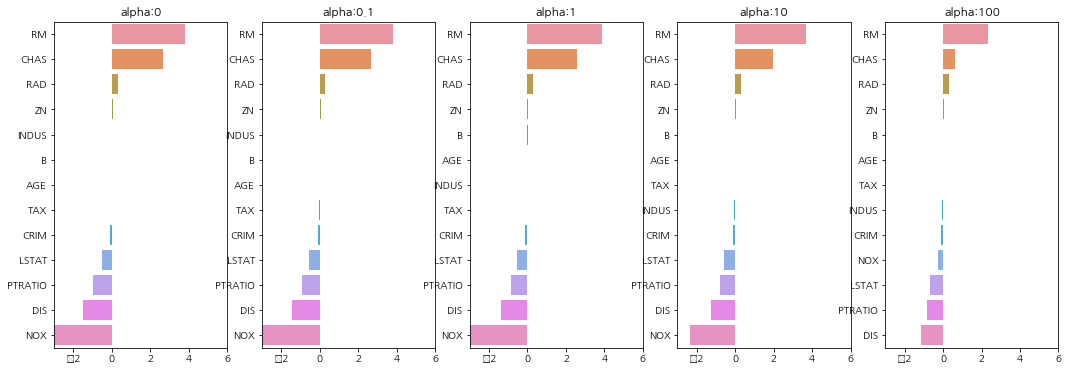

In [39]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [42]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


* alpha 값을 증가시킬수록 회귀 값은 지속적으로 작아짐
* 릿지 회귀의 경우 회귀 계수를 0 으로 만들지는 않음


## 라쏘 회귀

* W 절대값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용
* L1 규제가 회귀 계수의 크기를 감소시키는데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0 으로 만들고 제거
* 적절한 피처만 회귀에 포함시키는 피처 선택의 특성

In [44]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data , y_target)
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df
# end of get_linear_regre_eval

In [45]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [46]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


* alpha 가 증가하면서 CHAS, NOX, RM, INDUS, DIS 같은 속성의 회귀 계수는 0 을 바뀜
* 회귀 계수가 0 인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음



## 엘라스틱넷 회귀

* L2 규제 + L1 규제
* 중요 피처만을 선택하고 나머지는 회귀 계수를 0으로 만드는 성향이 강함
* 단점: 수행시간이 상대적으로 오래 걸림


In [48]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [49]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


* alpha: 0.5 일 때 RMSE 가 5.468로 가장 좋은 예측 성능 가지고 있음

## 선형 회귀 모델을 위한 데이터 변환

* 선형 회귀 모델은 feature 와 target 값의 분포가 정규 분포(평균을 중심으로 종 모양으로 데이터 값이 분포된 형태)를 매우 선호
* target 값이 정규 분포가 아니라 특정값의 분포가 치우친 왜곡(skew)된 형태인 경우 예측 성능 나빠짐
* 선형 회귀 모델에 적용하기 전에 데이터에 스케일링/정규화 작업 수행하는 것이 일반적
* 중요 feature 나 target 분포가 심하게 왜곡된 경우 수행

### 스케일링/정규화 방법

1. StandardScalar 클래스를 이용해 평균 0, 분산 1인 표준 정규 분포를 가진 데이터 세트로 변환하거나 MinMaxScaler 이용해 최소값 0 최대값 1 인 값으로 정규화 

2. 스케일링/정규화를 수행한 데이터 세트에 다시 다항 특성 적용하여 변환

3. 로그 변환 (Log Transformation) : 원래 값에 log 함수 적용. 특히 target 값에 할 경우 효과 좋음

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [52]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

* log 변환인 경우 가장 좋은 성능 향상이 나타남